In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import itertools

# Read the performance metrics 
## From the metrics.perf file

```
cost training:interpolation 1000:1 20.42638202879111
cost discretization:interpolation 10:0 20.504031897615224
time training:interpolation 1000:1 0.292188
time discretization:interpolation 10:0 0.016527
```

In [2]:
def read_perf_metrics(filename):
    inf = open(filename, "r")
    data = {}
    for line in inf:
        line = line.split("\n")[0].split(" ")
        lid = line[1] + line[2]
        if line[0] == "cost":
            data[lid] = {}
            data[lid]["type"] = line[1]
            params = line[1].split(":")
            for p in range(len(params)):
                data[lid][params[p]] = int(line[2].split(":")[p])
            data[lid]["cost"] = float(line[3])
            data[lid]["param"] = line[2]
            data[lid]["time"] = -1
        elif line[0] == "time":
            data[lid]["time"] = float(line[3])
    inf.close()

    df = pd.DataFrame(columns=["type", "param", "training",
                               "interpolation", "discretization",
                               "checkpoint", "cost", "time"])
    for lid in data:
        df = df.append(data[lid], ignore_index=True)
    return df

# Function to plot the metrics for a given study

In [3]:
def check_limit(cost_limit, df_print):
    if df_print["cost"].min() < cost_limit[0]:
        return False
    if df_print["cost"].max() > cost_limit[1]:
        return False
    return True

def plot_study(study, log=False, cost_limit=[]):
    params = study.split(':')
    values = []
    for p in range(1, len(params)):
        unique_values = df[df.type==study][params[p]].unique()
        values.append([int(i) for i in unique_values if i == i])

    fig, ax = plt.subplots(1, 2, figsize=(24,8))
    sns.set(font_scale=2)
    sns.set_style("white")

    for i in itertools.product(*values):
        df_print = df[df.type==study]
        label = ''
        for p in range(1, len(params)):
            df_print = df_print[df_print[params[p]] == i[p - 1]]
            label += " " + name[params[p]][i[p - 1]]

        if len(cost_limit)==2 and not check_limit(cost_limit, df_print):
            continue
        sns.lineplot(x=params[0], y="cost", data=df_print,
                     label = label, ax=ax[0])
        sns.lineplot(x=params[0], y="time", data=df_print,
                     label = label, ax=ax[1])

    # set the style of the lines
    style_lies = ['-', '--', '-.', ':']
    for cur_ax in ax:
        leg_lines = cur_ax.legend().get_lines()
        lines = cur_ax.lines
        for i in range(len(leg_lines)): 
            leg_lines[i].set_linestyle(style_lies[i % 4])
            lines[i].set_linestyle(style_lies[i % 4])

        cur_ax.grid(True)
    
    if log:
        ax[1].set_yscale('log')
    
    ax[0].set_ylabel("Cost")
    ax[1].set_ylabel("Time")

    plt.savefig("%s.png" %("_".join([i for i in params])))
    plt.show()

# Plot each study

In [4]:
df = read_perf_metrics("metrics.perf")
df.head()

,type,param,training,interpolation,discretization,checkpoint,cost,time
0,training:interpolation,10:0,10,0,NaN,NaN,155786.656667,0.238576
1,training:interpolation,25:0,25,0,NaN,NaN,155786.656667,0.241724
2,training:interpolation,50:0,50,0,NaN,NaN,148958.320000,0.241401
3,training:interpolation,100:0,100,0,NaN,NaN,148958.320000,0.244473
4,training:interpolation,300:0,300,0,NaN,NaN,148125.616667,0.253965


In [5]:
name = {}
name["interpolation"] = ["No interpolation", "Polynomial interpolation"]
name["checkpoint"] = ["Never CR", "Always CR", "Adaptive CR"]

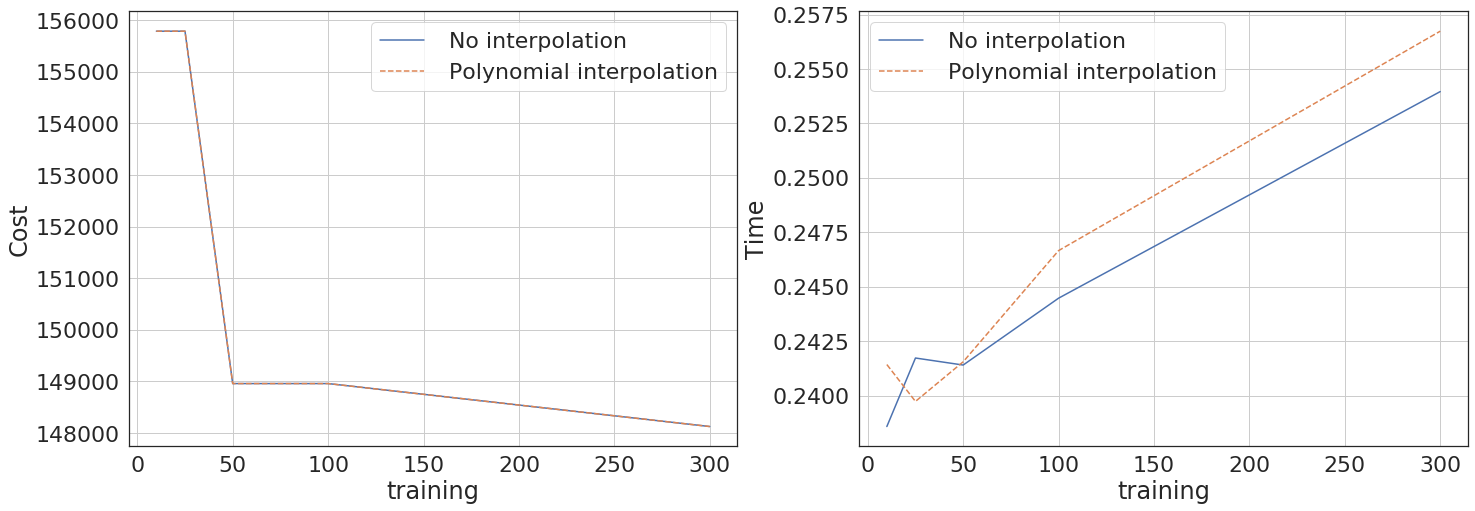

In [7]:
plot_study("training:interpolation")

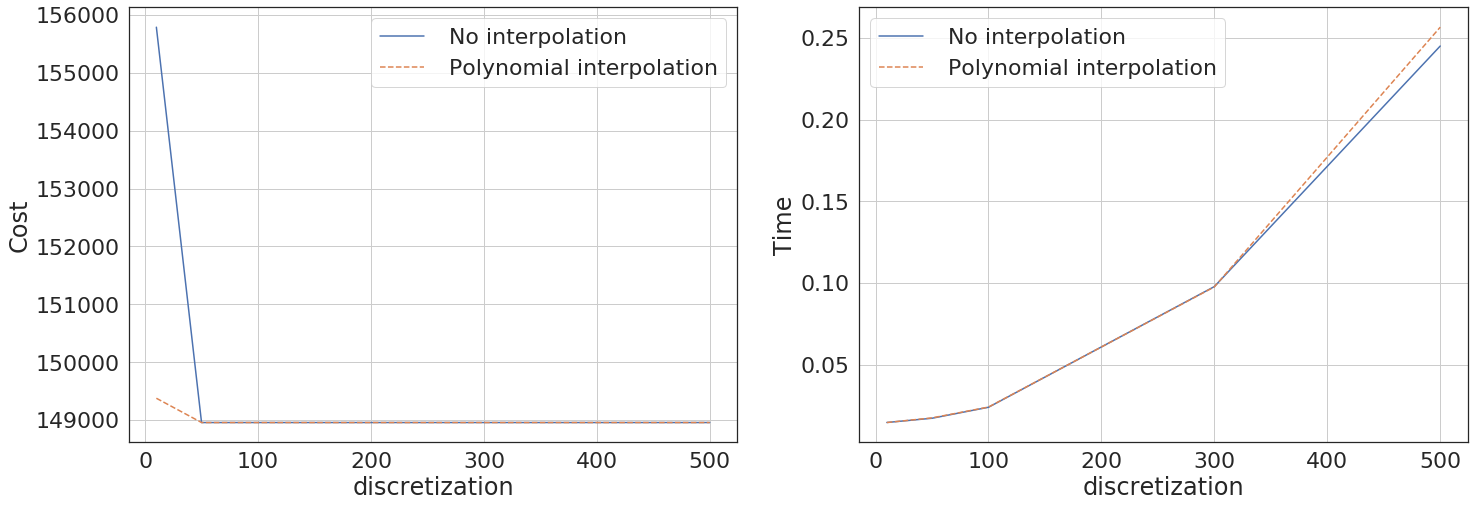

In [8]:
plot_study("discretization:interpolation")

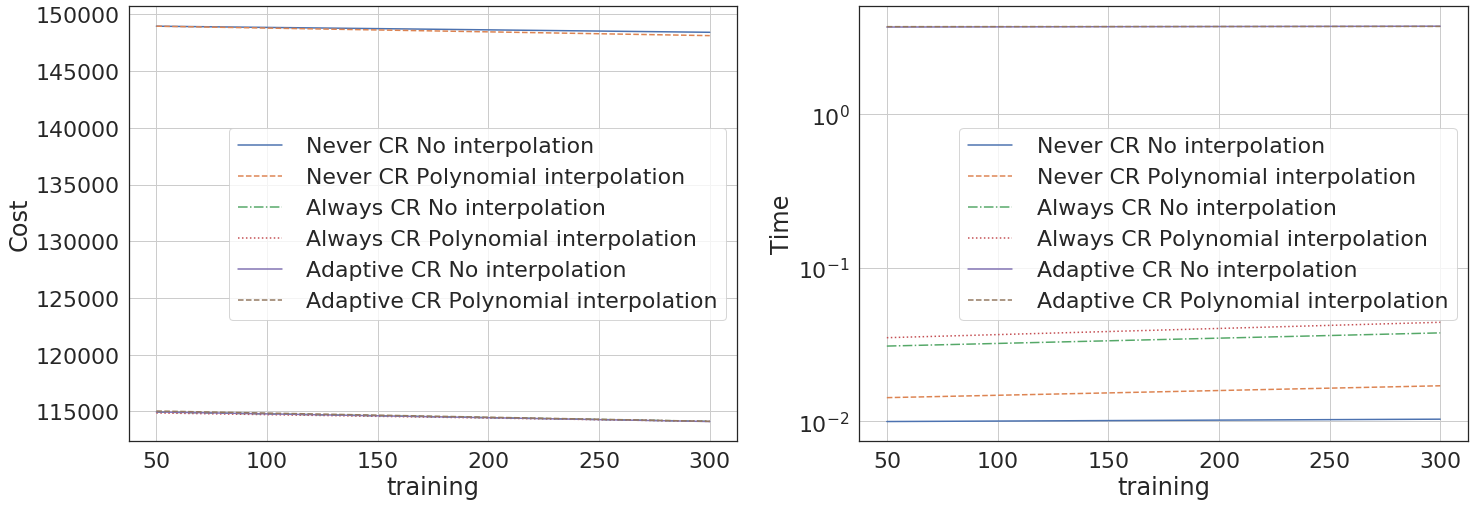

In [9]:
plot_study("training:checkpoint:interpolation", log=True)

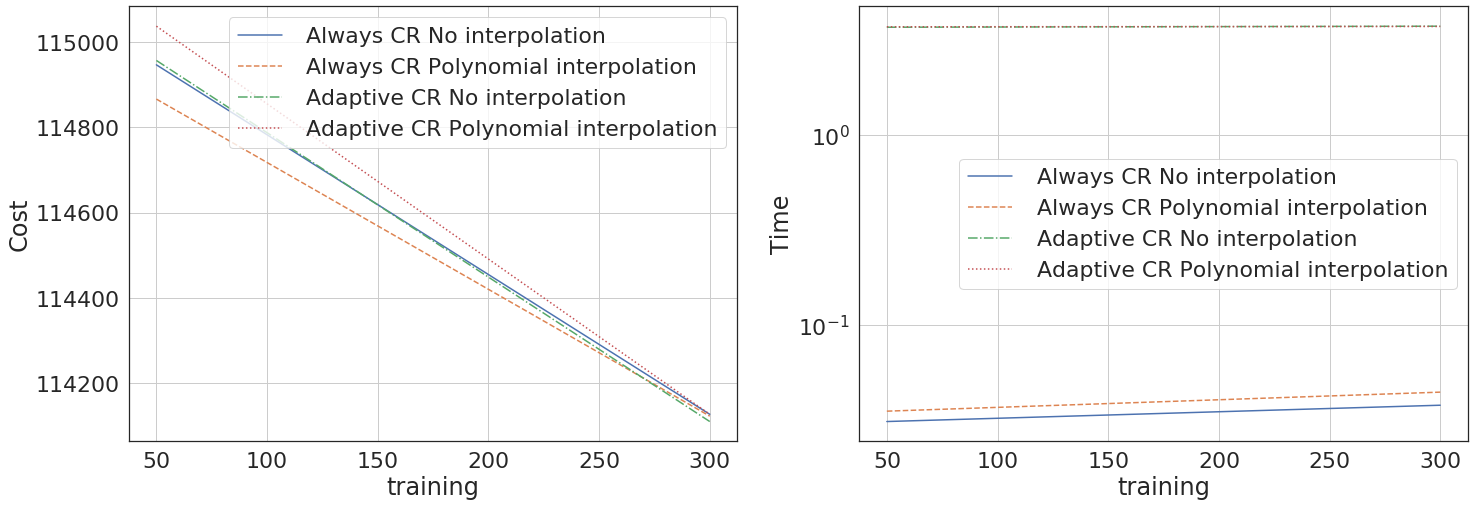

In [10]:
plot_study("training:checkpoint:interpolation",
           log=True, cost_limit=[0, 140000])

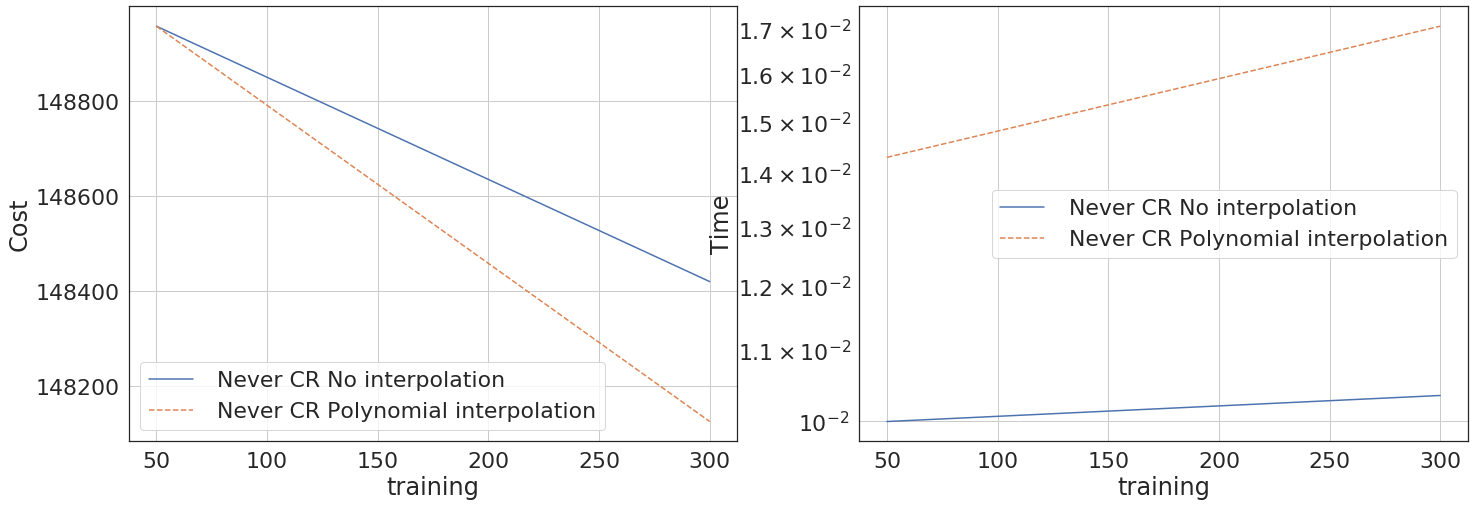

In [11]:
plot_study("training:checkpoint:interpolation",
           log=True, cost_limit=[140000, 150000])